# Comparison of Venues Between Beyoğlu and Kadıköy

## 1. Problem Description & Discussion of the Background

Istanbul is one of the biggest cities in the world with a population over 15 million. It is also a big entartainment center for both tourists and residents. Until a few years ago, Beyoğlu was the number one borough for all kinds of entartainment venues, but it started to change after a few terrorist attacks and bad political decisions. After that Kadıköy borough which is located in the Asia side of the city increased its popularity. On the other hand, city authorities tries to attract people to Beyoğlu, and increase its popularity again.

In this project I will compare two boroughs of Istanbul which are centeral places for entertainment venues.

This will help investors that interested in opening a venue in the city. It will be helpful if we can provide information about density, location, and category information of venues to them.

## 2. Data Description

Based on the problem description following factors will be used:

* Number of venues in given borough
* Category of venues
* Density of venue categories for each borough
* Average house renting prices

To obtain above information I will use

* Python geopy library to convert an address into latitude and longitude values.
* Foursquare API to get number, category, and location information of nearby venues in selected boroughs.
* Finally Zingat [website](https://www.zingat.com/bolge-raporu) to get average house renting prices for two boroughs which also gives information about some demographic information of residents. 

## 3. Methodology

I will first get venues near a selected venue for each borough, and then explore venues with Foursquare API.
After getting the venues, I will extract venue categories and show top 10 category for each borough.

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

### Map of Istanbul

Get latitude and longitude values for Istanbul.

In [2]:
address = 'Istanbul, Turkey'

geolocator = Nominatim(user_agent="istanbul_explorer")
location = geolocator.geocode(address)
ist_latitude = location.latitude
ist_longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(ist_latitude, ist_longitude))

The geograpical coordinate of Istanbul are 41.0096334, 28.9651646.


Get latitude and longitude values for Beyoğlu borough.

In [3]:
address = 'Beyoğlu, Istanbul, Turkey'

geolocator = Nominatim(user_agent="beyoglu_explorer")
location = geolocator.geocode(address)
bey_latitude = location.latitude
bey_longitude = location.longitude
print('The geograpical coordinate of Beyoğlu are {}, {}.'.format(bey_latitude, bey_longitude))

The geograpical coordinate of Beyoğlu are 41.0283456, 28.9739877.


Get latitude and longitude values for Kadıköy borough.

In [4]:
address = 'Kadıkoy, Istanbul, Turkey'

geolocator = Nominatim(user_agent="kadikoy_explorer")
location = geolocator.geocode(address)
kad_latitude = location.latitude
kad_longitude = location.longitude
print('The geograpical coordinate of Kadıköy are {}, {}.'.format(kad_latitude, kad_longitude))

The geograpical coordinate of Kadıköy are 40.9768636, 29.074825.


Show the map of Istanbul with two boroughs marked.

In [5]:
ist_map = folium.Map(location=[ist_latitude, ist_longitude], zoom_start=10)
    
folium.Marker(location=[bey_latitude, bey_longitude], popup='Beyoğlu').add_to(ist_map)
folium.Marker(location=[kad_latitude, kad_longitude], popup='Kadıköy').add_to(ist_map)

ist_map

<img src="images/map_1.png">

### Data Exploring for Beyoğlu

##### I will take "Çiçek Pasajı" as a center point for Beyoğlu, because it is almost the mid point for famous Istiklal Street which contains most of the entertainment places

In [5]:
address = 'Çiçek Pasajı, Beyoğlu, Istanbul'

geolocator = Nominatim(user_agent="beyoglu_explorer")
location = geolocator.geocode(address)
cp_latitude = location.latitude
cp_longitude = location.longitude
print('The geograpical coordinate of Çiçek Pasajı are {}, {}.'.format(cp_latitude, cp_longitude))

The geograpical coordinate of Çiçek Pasajı are 41.0340997, 28.9779211.


In [6]:
beyoglu_map = folium.Map(location=[cp_latitude, cp_longitude], zoom_start=15)  

folium.Marker(location=[cp_latitude, cp_longitude], popup='Çiçek Pasajı').add_to(beyoglu_map)

beyoglu_map

<img src="images/map_2.png">

Define Foursquare api credentials

In [1]:
CLIENT_ID = '***'
CLIENT_SECRET = '***'
VERSION = '20190916'

In [17]:
radius = 1500
LIMIT = 500

In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent=browse'.format(CLIENT_ID, CLIENT_SECRET, cp_latitude, cp_longitude, VERSION, radius, LIMIT)

In [19]:
results = requests.get(url).json()

In [20]:
venues = results['response']['venues']

In [21]:
len(venues)

196

In [22]:
venues[:10]

[{'id': '4badf2dff964a520e7743be3',
  'name': 'Çiçek Pasajı',
  'location': {'address': 'Hüseyinağa Mah. İstiklal Cad. No:80',
   'lat': 41.03403052923271,
   'lng': 28.977969850612656,
   'labeledLatLngs': [{'label': 'display',
     'lat': 41.03403052923271,
     'lng': 28.977969850612656}],
   'distance': 8,
   'postalCode': '34435',
   'cc': 'TR',
   'city': 'Beyoğlu',
   'state': 'İstanbul',
   'country': 'Türkiye',
   'formattedAddress': ['Hüseyinağa Mah. İstiklal Cad. No:80',
    '34435 Beyoğlu',
    'Türkiye']},
  'categories': [{'id': '4bf58dd8d48988d117941735',
    'name': 'Beer Garden',
    'pluralName': 'Beer Gardens',
    'shortName': 'Beer Garden',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/beergarden_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1568900982',
  'hasPerk': False},
 {'id': '4b50966af964a520632827e3',
  'name': 'İstiklal Caddesi',
  'location': {'lat': 41.034111494765284,
   'lng': 28.978815233800894,
   'd

In [23]:
json_normalize(venues).head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet,location.neighborhood
0,4badf2dff964a520e7743be3,Çiçek Pasajı,"[{'id': '4bf58dd8d48988d117941735', 'name': 'B...",v-1568900982,False,Hüseyinağa Mah. İstiklal Cad. No:80,41.034031,28.977970,"[{'label': 'display', 'lat': 41.03403052923271...",8,34435,TR,Beyoğlu,İstanbul,Türkiye,"[Hüseyinağa Mah. İstiklal Cad. No:80, 34435 Be...",NaN,NaN,NaN
1,4b50966af964a520632827e3,İstiklal Caddesi,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",v-1568900982,False,NaN,41.034111,28.978815,NaN,75,34400,TR,Beyoğlu,İstanbul,Türkiye,"[34400 Beyoğlu, Türkiye]",96127337,NaN,NaN
2,4fce4205e4b0b705e8c6add5,Stop Restaurant,"[{'id': '4f04af1f2fb6e1c99f3db0bb', 'name': 'T...",v-1568900982,False,Istiklal caddesi Çiçek Pasajı No : 14 Beyoğlu,41.034159,28.977954,"[{'label': 'display', 'lat': 41.03415887298438...",7,NaN,TR,İstanbul,İstanbul,Türkiye,[Istiklal caddesi Çiçek Pasajı No : 14 Beyoğlu...,NaN,NaN,NaN
3,548cb4f6498e73a77bb97b38,Çiçek Pasajı Stop Restaurant,"[{'id': '4bf58dd8d48988d118941735', 'name': 'D...",v-1568900982,False,Beyoğlu,41.034135,28.977954,"[{'label': 'display', 'lat': 41.03413509814825...",4,NaN,TR,İstanbul,İstanbul,Türkiye,"[Beyoğlu, İstanbul, Türkiye]",NaN,NaN,NaN
4,4ba3bb2ef964a5204b5938e3,Şampiyon Kokoreç,"[{'id': '5283c7b4e4b094cb91ec88d6', 'name': 'K...",v-1568900982,False,Sahne Sok. No:1-3 Beyoğlu,41.033953,28.977812,"[{'label': 'display', 'lat': 41.03395289068489...",18,NaN,TR,Beyoğlu,İstanbul,Türkiye,"[Sahne Sok. No:1-3 Beyoğlu (Balık Pazarı), Bey...",NaN,Balık Pazarı,NaN


Define a function to extract category of the venue

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Convert venues json result to DataFrame and get categories

In [25]:
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng', 'location.address']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng,address
0,Çiçek Pasajı,Beer Garden,41.034031,28.977970,Hüseyinağa Mah. İstiklal Cad. No:80
1,İstiklal Caddesi,Road,41.034111,28.978815,NaN
2,Stop Restaurant,Turkish Restaurant,41.034159,28.977954,Istiklal caddesi Çiçek Pasajı No : 14 Beyoğlu
3,Çiçek Pasajı Stop Restaurant,Dive Bar,41.034135,28.977954,Beyoğlu
4,Şampiyon Kokoreç,Kokoreç Restaurant,41.033953,28.977812,Sahne Sok. No:1-3 Beyoğlu
5,Ceneviz Meyhanesi,Other Nightlife,41.034130,28.977841,İstiklal Cad. Tarihi Çiçek Pasajı No:12 Beyoğlu
6,Taksim,Other Great Outdoors,41.034168,28.981783,NaN
7,Kimene Restaurant,Steakhouse,41.034108,28.977980,NaN
8,Manolya Restoran,Restaurant,41.034061,28.977948,İstiklal Cd. Çiçek Pasajı
9,Tarihi Cicek Pasaji - Kime Ne Restaurant,Restaurant,41.034034,28.977984,Beyoglu


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

196 venues were returned by Foursquare.


Check how many venues were returned for each category.

In [27]:
nearby_venues.groupby('categories', as_index=False).count()

,categories,name,lat,lng,address
0,ATM,1,1,1,1
1,Accessories Store,1,1,1,0
2,Airport,1,1,1,0
3,American Restaurant,2,2,2,2
4,Antique Shop,2,2,2,1
5,Art Gallery,1,1,1,0
6,Art Studio,1,1,1,1
7,Arts & Crafts Store,1,1,1,0
8,Auditorium,1,1,1,1
9,Bagel Shop,1,1,1,0


Create a dataframe for category counts

In [28]:
category_counts_df = nearby_venues['categories'].value_counts().to_frame()

In [29]:
category_counts_df.head(10)

,categories
Restaurant,11
Nightclub,8
Seafood Restaurant,7
Bookstore,7
Turkish Restaurant,7
Café,7
Office,6
Building,6
Bar,6
Kokoreç Restaurant,4


#### Top 10 categories

In [30]:
category_top_10 = category_counts_df.head(10)

Plot the top 10 categories.

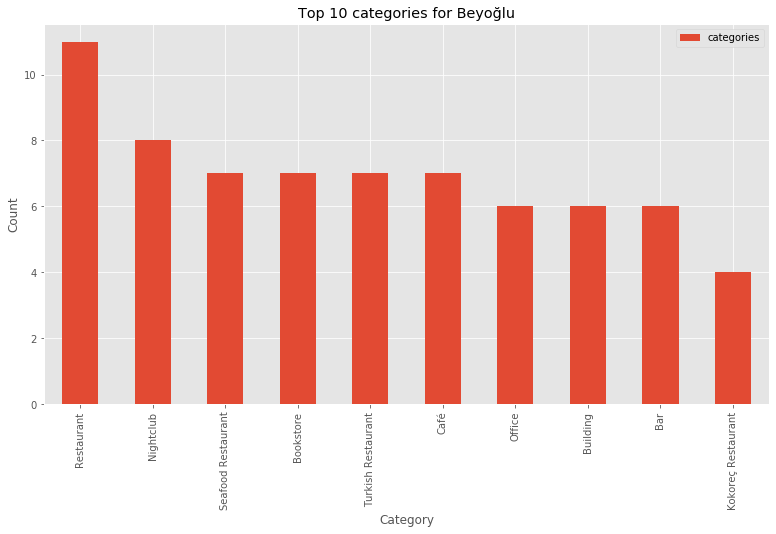

In [31]:
category_top_10.plot(kind='bar', figsize=(13, 7))

plt.title('Top 10 categories for Beyoğlu')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

Create empty dataframe for putting top 10 categories.

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
beyoglu_top_10_categories_df = pd.DataFrame(columns=columns)

In [33]:
beyoglu_top_10_categories_df

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Fill the dataframe with values for Beyoğlu borough.

In [34]:
beyoglu_top_10_categories_df.loc[0] = ['Beyoğlu'] + list(category_counts_df.head(10).index.values)

In [35]:
beyoglu_top_10_categories_df

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beyoğlu,Restaurant,Nightclub,Seafood Restaurant,Bookstore,Turkish Restaurant,Café,Office,Building,Bar,Kokoreç Restaurant


Get average rent price for Beyoğlu.

In [36]:
from rent_price_parser import get_average_prices

In [37]:
beyoglu_avg_rent, _ = get_average_prices()


*** Parsing url: https://www.zingat.com/beyoglu-bolge-raporu ...
*** Response status: 200
Avg. Rent Price for BEYOGLU: 3.413

*** Parsing url: https://www.zingat.com/kadikoy-bolge-raporu ...
*** Response status: 200
Avg. Rent Price for KADIKOY: 2.179


In [38]:
beyoglu_top_10_categories_df['Average Rent'] = beyoglu_avg_rent * 1000

In [39]:
beyoglu_top_10_categories_df

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
0,Beyoğlu,Restaurant,Nightclub,Seafood Restaurant,Bookstore,Turkish Restaurant,Café,Office,Building,Bar,Kokoreç Restaurant,3413.0


### Data Exploring for Kadıköy

##### I will take "Moda Sahnesi" as center to explore venues for Kadıköy borough.

In [40]:
address = 'Moda Sahnesi, Kadıköy, Istanbul'

geolocator = Nominatim(user_agent="kadikoy_explorer")
location = geolocator.geocode(address)
moda_latitude = location.latitude
moda_longitude = location.longitude
print('The geograpical coordinate of Moda Sahnesi are {}, {}.'.format(moda_latitude, moda_longitude))

The geograpical coordinate of Moda Sahnesi are 40.9870051, 29.0286426.


In [41]:
kadikoy_map = folium.Map(location=[moda_latitude, moda_longitude], zoom_start=14)  

folium.Marker(location=[moda_latitude, moda_longitude], popup='Moda Sahnesi').add_to(kadikoy_map)

kadikoy_map

<img src="images/map_3.png">

In [42]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent=browse'.format(CLIENT_ID, CLIENT_SECRET, moda_latitude, moda_longitude, VERSION, radius, LIMIT)

In [43]:
results_moda = requests.get(url2).json()

In [44]:
kad_venues = results_moda['response']['venues']

In [45]:
len(kad_venues)

189

In [46]:
kad_venues[:10]

[{'id': '570be2c7498e269d167a1c63',
  'name': 'Moda Sahnesi',
  'location': {'address': 'General Asım Gündüz Cad. (Bahariye Cad.) Halil Etham Sk. No: 34/27',
   'crossStreet': 'Bahariye Caddesi',
   'lat': 40.98699785241428,
   'lng': 29.028515563943444,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.98699785241428,
     'lng': 29.028515563943444}],
   'distance': 10,
   'postalCode': '34714',
   'cc': 'TR',
   'neighborhood': 'Caferağa',
   'city': 'İstanbul',
   'state': 'İstanbul',
   'country': 'Türkiye',
   'formattedAddress': ['General Asım Gündüz Cad. (Bahariye Cad.) Halil Etham Sk. No: 34/27 (Bahariye Caddesi)',
    '34714 İstanbul',
    'Türkiye']},
  'categories': [{'id': '4bf58dd8d48988d137941735',
    'name': 'Theater',
    'pluralName': 'Theaters',
    'shortName': 'Theater',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_',
     'suffix': '.png'},
    'primary': True}],
  'venuePage': {'id': '177024833'}

In [47]:
kad_nearby_venues = json_normalize(kad_venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng', 'location.address']
kad_nearby_venues = kad_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
kad_nearby_venues['categories'] = kad_nearby_venues.apply(get_category_type, axis=1)

# clean columns
kad_nearby_venues.columns = [col.split(".")[-1] for col in kad_nearby_venues.columns]

kad_nearby_venues.head(10)

,name,categories,lat,lng,address
0,Moda Sahnesi,Theater,40.986998,29.028516,General Asım Gündüz Cad. (Bahariye Cad.) Halil...
1,Kamo Kitabevi,Used Bookstore,40.986971,29.028739,Bahariye caddesi Halil Ethem sokak Kafkas pasa...
2,Kadıköy Halk Eğitim Merkezi,Theater,40.986814,29.028981,Bahariye Cad. No:39
3,Somunarası&Balkan Köftecisi Kadıköy,Kofte Place,40.987225,29.028270,NaN
4,Kafkas Inguş Dostluk Derneği,Social Club,40.986862,29.028720,NaN
5,Moda Sahaflar Çarşısı,Used Bookstore,40.987061,29.029107,NaN
6,Artemis Sahaf,Used Bookstore,40.987093,29.028766,Bahariye Caddesi Kafkas Pasajı 37/16
7,Raremancers,Bookstore,40.986975,29.028912,Kafkas Pasajı No:32/36
8,Be Nu Me,Fast Food Restaurant,40.986948,29.028339,Bahariye
9,penguen cafe,Café,40.987140,29.029119,NaN


In [48]:
print('{} venues were returned by Foursquare.'.format(kad_nearby_venues.shape[0]))

189 venues were returned by Foursquare.


In [49]:
kad_category_counts_df = kad_nearby_venues['categories'].value_counts().to_frame()

In [50]:
kad_category_counts_df.head(10)

,categories
Office,20
Coworking Space,16
Dentist's Office,8
Building,7
Café,7
Business Center,7
Theater,6
Art Gallery,6
Courthouse,6
Used Bookstore,4


#### Top 10 categories

In [51]:
kad_category_top_10 = kad_category_counts_df.head(10)

Plot the top 10 categories.

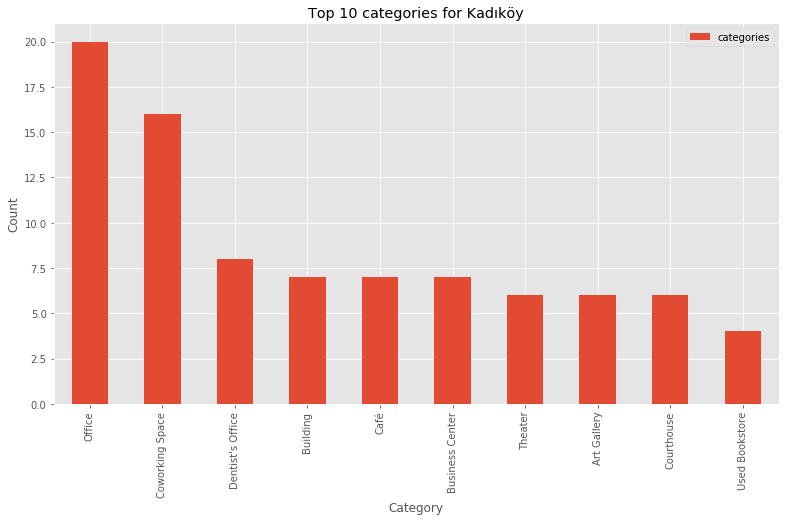

In [52]:
kad_category_top_10.plot(kind='bar', figsize=(13, 7))

plt.title('Top 10 categories for Kadıköy')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

Create empty dataframe for putting top 10 categories.

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
kadikoy_top_10_categories_df = pd.DataFrame(columns=columns)

Fill the dataframe.

In [54]:
kadikoy_top_10_categories_df.loc[0] = ['Kadıköy'] + list(kad_category_counts_df.head(10).index.values)

In [55]:
kadikoy_top_10_categories_df

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kadıköy,Office,Coworking Space,Dentist's Office,Building,Café,Business Center,Theater,Art Gallery,Courthouse,Used Bookstore


Get average rent price for Kadıköy.

In [56]:
_, kadikoy_avg_rent = get_average_prices()


*** Parsing url: https://www.zingat.com/beyoglu-bolge-raporu ...
*** Response status: 200
Avg. Rent Price for BEYOGLU: 3.413

*** Parsing url: https://www.zingat.com/kadikoy-bolge-raporu ...
*** Response status: 200
Avg. Rent Price for KADIKOY: 2.179


In [57]:
kadikoy_top_10_categories_df['Average Rent'] = kadikoy_avg_rent * 1000

In [58]:
kadikoy_top_10_categories_df

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
0,Kadıköy,Office,Coworking Space,Dentist's Office,Building,Café,Business Center,Theater,Art Gallery,Courthouse,Used Bookstore,2179.0


Create a new merged dataframe for results.

In [59]:
results_df = pd.DataFrame(columns=beyoglu_top_10_categories_df.columns)

In [60]:
results_df.loc[0] = beyoglu_top_10_categories_df.loc[0]
results_df.loc[1] = kadikoy_top_10_categories_df.loc[0]

In [61]:
results_df

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
0,Beyoğlu,Restaurant,Nightclub,Seafood Restaurant,Bookstore,Turkish Restaurant,Café,Office,Building,Bar,Kokoreç Restaurant,3413.0
1,Kadıköy,Office,Coworking Space,Dentist's Office,Building,Café,Business Center,Theater,Art Gallery,Courthouse,Used Bookstore,2179.0


Plot results side by side.

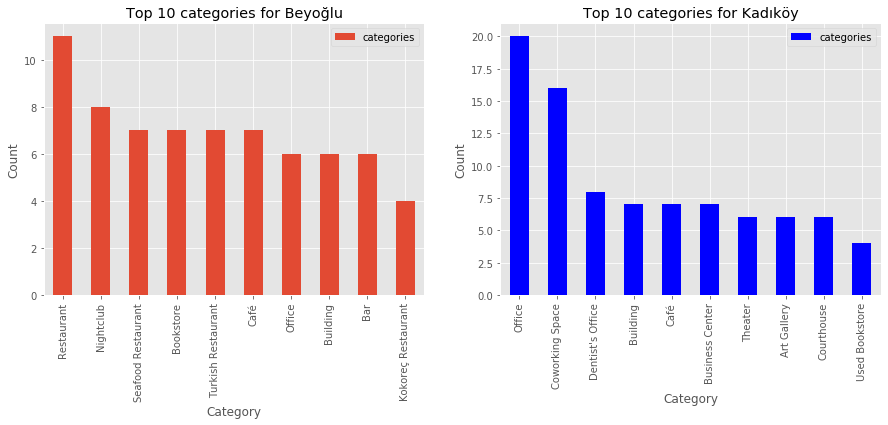

In [62]:
fig = plt.figure()

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Subplot 1 for Beyoğlu
category_top_10.plot(kind='bar', figsize=(15, 5), ax=ax0)
ax0.set_title('Top 10 categories for Beyoğlu')
ax0.set_xlabel('Category')
ax0.set_ylabel('Count')

# Subplot 2 for Kadıköy
kad_category_top_10.plot(kind='bar', color='blue', figsize=(15, 5), ax=ax1)
ax1.set_title('Top 10 categories for Kadıköy')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')

plt.show()

## 4. Results and Discussion

In this project, I started with explaining the intention of project, and gave a brief background information about Istanbul. I selected the two popular boroughs of Istanbul, and showed them on the map.

First, I started to analyze venues for Beyoğlu borough. I received the venue information near the middle point of Istiklal Street, and then extracted categories of venues. Then I obtained the top 10 venue categories. Finally, I showed the top 10 result as a bar plot.

I repeated the same process for Kadıköy borough, and merged the results.

I also received the average house renting prices for both boroughs by parsing a real estate website.

Since I selected a small part of the boroughs, it may not give exact opinion, but it gives a general idea about venues, their densities and types in the determined areas.

## 5. Conclusion

Purpose of this project was to give an idea to investors that will open a venue in a popular place of Istanbul. 

In spite of Beyoğlu lost its popularity recently, it is still a good option to opening an entartainment based place. On the other hand, renting price averages are much more expensive than Kadıköy.

This data can give information not just to investors, but also to city authorities to take action.